Task 2P: Working with numpy Vectors (Unidimensional Data)

Vishal Shah
student id: s223623935

s223623935@deakin.edu.au 
 
*The given task expects us to download daily price data of BTC-USD from website and perform stastical computations such as mean,median,IQR,outlier,plot for specific range as an exercise*

Create a single Jupyter/IPython notebook 
The use of pandas is forbidden. You can use scipy, though.

Do not use for loops or list comprehensions – this is an exercise on numpy.

1.We download the latest daily close BTC-to-USD data, from 2023-01-01 up to this day,available at https://finance.yahoo.com/quote/BTC-USD (the Historical Data tab).\
Using MS Excel we manually remove everything except the numeric values in the Close column. \
Also retain column labels,it will be skipped using numpy command.\
Export these observations to a CSV file (which should only contain numbers, one per line).

*2. Use numpy.genfromtxt or numpy.loadtxt to read the above BTC-to-USD data as a numpy vector named rates.*

In [2]:
import numpy as np  # import numpy library

# Specify the file path
file_path = 'C:\\Users\\Vishal.shah.LAMINAAR\\OneDrive - Laminaar Aviation Infotech (India) Private Limited\\Desktop\\MDS\\SIG731- Data Wrangling Content\\tasks\\2P\\BTC-USD.csv'

# Use genfromtxt to load CSV data
# Assuming the file has two columns: Date, BTC-to-USD Rate, use skip_header to ignore labels in the csv file.
data = np.genfromtxt(file_path, delimiter=',', skip_header=1)


# Extract BTC-to-USD rates as a numpy vector
rates = data[:, 1]

# Display the vector
print(rates)


[16547.914063 16625.509766 16688.847656 16680.205078 16863.472656
 16836.472656 16952.117188 16954.146484 17093.992188 17192.949219
 17446.359375 18117.59375  18868.90625  19910.537109 20977.484375
 20882.224609 21175.833984 21161.050781 20686.746094 21085.373047
 22677.427734 22777.986328 22721.087891 22929.626953 22639.267578
 23108.955078 23030.716797 23079.964844 23031.449219 23774.648438
 22840.796875 23137.835938 23720.824219 23469.412109 23446.320313
 23332.248047 22954.021484 22757.267578 23263.416016 22946.566406
 21819.005859 21651.841797 21870.902344 21787.       21801.822266
 22220.585938 24307.349609 23621.283203 24565.296875 24640.027344
 24336.623047 24833.048828 24437.417969 24190.71875  23946.007813
 23200.125    23174.150391 23561.451172 23521.837891 23150.929688
 23647.019531 23476.632813 22362.923828 22354.144531 22436.816406
 22428.322266 22216.441406 21720.080078 20367.001953 20187.876953
 20628.029297 22156.40625  24201.765625 24770.925781 24373.457031
 25055.123

*3. For the third quarter of the year only (Q3 2023; days 182–273 inclusive), we determine and display (in a readable manner) the following aggregates:*
* arithmetic mean,
* minimum,
* the first quartile,
* median,
* the third quartile,
* maximum,
* standard deviation,
* interquartile range. 

In [3]:
print("Arithmetic mean    =", round(np.mean(rates),2))                     # using numpy airthmetic mean function
print("Minimum            =", round(np.min(rates),2))                      # using numpy minimum function
print("The First Quartile =", round(np.quantile(rates,0.25),2))            # using numpy quantile function with 0.25 for Q1
print("Median             =", round(np.median(rates),2))                   # using numpy median
print("The Third Quartile =", round(np.quantile(rates,0.75),2))            # using numpy quantile function with 0.75 for Q3
print("Maximum            =", round(rates.max(),2))                        # using numpy maximum function
print("Standard deviation =", round(np.std(rates),2))                      # using numpy standard deviation function
# using numpy IQR = Q3-Q1 function
print("Interquartile Range=", round(np.subtract(np.quantile(rates,[0.75]),np.quantile(rates,[0.25]))[0],2))   


Arithmetic mean    = 28990.24
Minimum            = 16547.91
The First Quartile = 25934.09
Median             = 27796.96
The Third Quartile = 30343.14
Maximum            = 44961.6
Standard deviation = 6093.43
Interquartile Range= 4409.05


*4. Using matplotlib.pyplot.plot we draw the Q3 2023 data (with 182 denoting 1 July),\
we signify the plot using red solid line segments, we also add the plot title "BTC to USD in Q3 2023"

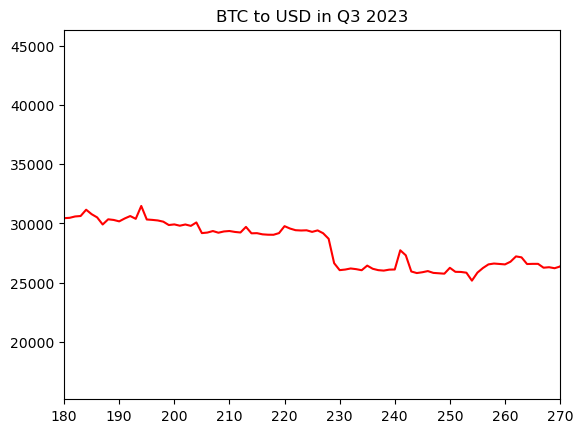

In [80]:
import matplotlib.pyplot as plt
# plt.scatter(x= np.arange(0,len(rates)),y=rates, marker = '')

# Create a simple line plot with red color line and specificaly Q3 data range.
plt.plot(np.arange(0,len(rates)),rates, label='Line Plot', color ='r')

# adding title
plt.title('BTC to USD in Q3 2023')

#viewing only 3rd quarter 180 days => 29june2023 onwards
plt.xlim(180,270)
plt.show()

*Data for the given duration is almost flattish and stays in range 25000 to 32000*

5. Determining the day numbers (with 182 denoting 1 July) with the lowest and highest observed prices
in Q3 2023.

In [5]:
day_min = 180 + np.argmin(rates[180:270]) 
# using argmin function we find index value for minimum number in the Q3 and add 180 days 

day_min_value1 = rates[day_min]
day_min_value2 = np.min(rates[180:270])
# we can verify minimum value is same as value pointed by argmin function 

day_max = 180 + np.argmax(rates[180:270])

day_max_value1= rates[day_max]
day_max_value2 = np.max(rates[180:270])
# we can verify minimum value is same as value pointed by argmin function 

day_min, day_min_value1,day_min_value2, day_max, day_max_value1, day_max_value2

(254, 25160.658203, 25160.658203, 194, 31474.720703, 31474.720703)

### Lowest price was on day 254 (25160.65).
### Highest price was on day 194 (31474.72).

6. Using matplotlib.pyplot.boxplot, draw a horizontal box-and-whisker plot for the Q3 2023
daily price increases/decreases as obtained by a call to numpy.diff.\
Using an additional call to matplotlib.pyplot.plot, mark the arithmetic mean on the box plot
with a green “x”.\


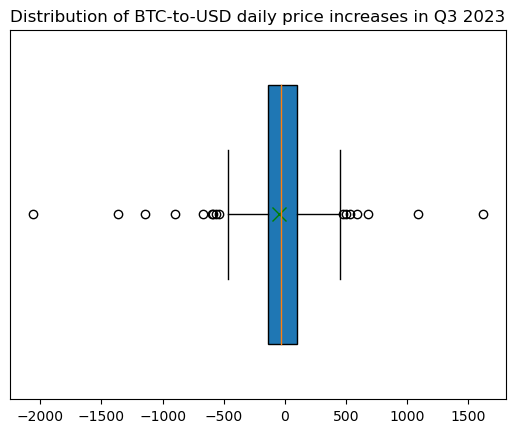

In [7]:
#calculates the daily price changes by taking the differences between consecutive days.
price_changes = np.diff(rates[180:270])

# Create a box-and-whisker plot, set vert=False to plot horizontal bar
plt.boxplot(price_changes, vert=False, widths=0.7, patch_artist=True)

# Mark the mean with a green "x"
mean_value = np.mean(price_changes)
plt.plot(mean_value, 1, 'gx', markersize=10, label='Mean')

# title as relevant
plt.title("Distribution of BTC-to-USD daily price increases in Q3 2023")

# Remove ticks from y axis by setting empy set
plt.yticks([])
plt.show()

*As we observe there are several outliers that influences the mean_value computation*

7. Programmatically, using the vectorised relational operators from numpy we compute how many outliers the boxplot contains

In [71]:
# computing inter quartile range using np.quantile function. 
#IQR = Q3-Q1

iqr = (np.quantile(price_changes,0.75) - np.quantile(price_changes,0.25)) 

#upper whisker = Q3+ 1.5*IQR
upper = np.quantile(price_changes,0.75) + 1.5*iqr

#lower whisker = Q1 - 1.5*IQR
lower = np.quantile(price_changes,0.25) - 1.5*iqr

# print lower and upper whisker
print(iqr,lower,upper)

237.7675780000027 -495.7216790000075 455.34863300000325


In [75]:
# compute how many values lie below lower whisker and above upper whisker
np.count_nonzero(price_changes[price_changes > upper])+ np.count_nonzero(price_changes[price_changes < lower])

16

*As we notice, there are 16 such values in price difference which are outliers.Outlier impacts mean while median is insulated from outliers.

In [86]:
np.mean(price_changes), np.median(price_changes)

(-47.548937853932564, -34.310546999997314)

*For practical application of this data, median is more reliable then mean due to outliers affecting mean.*
*Alternatively if outliers have to be replaced by some other values then outliers can be treated before mean can be computed*
*Outlier can be given values of upper and lower whisker or diminished from computation.*